### Load Library

In [1]:
import pandas as pd
import numpy as np
import psycopg2
import base64
from IPython.display import Image

/Users/choic3/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### Connect GPDB

####  <font color='red'> *Change your connection info </font>

In [2]:
conn = psycopg2.connect("dbname='cbjazz' user='gpadmin' password='changeme' host='mdw' port=5432")

### Draw Chart on GPDB

In [3]:
sql = """
SELECT home_project.py_ma_band_plot_chart(X, Y, title, 20, 2.0, opt)
FROM (
SELECT string_agg(s_close::text, ',' order by s_date) Y,
    string_agg((s_date - '2017-01-01'::date)::text, ',' order by s_date) X,
    code title,
    '{
    \"style\":\"bmh\", 
    \"figure.figsize\": [12.0, 6.0], 
    \"legend.loc\":\"upper right\",
    \"axes.color_pallete\":[\"#173F5F\", \"#20639B\", \"#ED553B\", \"#3CAEA3\", \"#F6D55C\"],
    \"axes.color_alpha\":0.7,
    \"axes.band_color\" : \"#F6D55C\",
    \"axes.band_color_alpha\" : 0.3
    }' opt
FROM stock.price
WHERE code IN ('000240.KS', '090435.KS')
GROUP BY code
) as a
"""

In [4]:
cur = conn.cursor()
cur.execute(sql)
rows = cur.fetchall()
cur.close()

In [5]:
conn.close()

###  Draw Chart

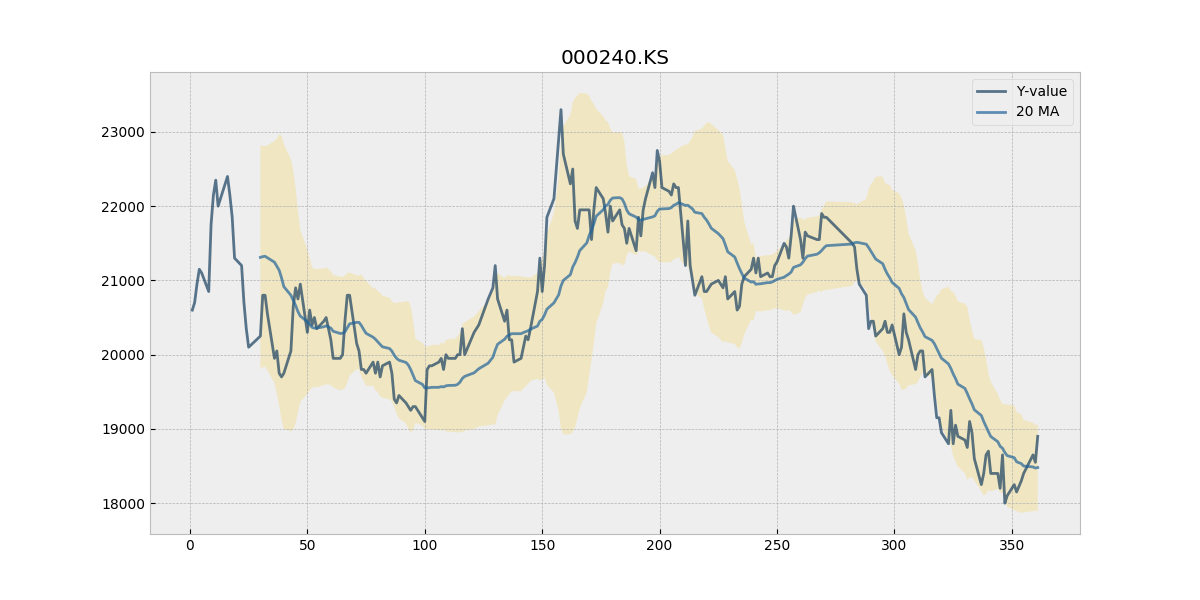

In [6]:
image = base64.b64decode(rows[0][0])
Image(image)

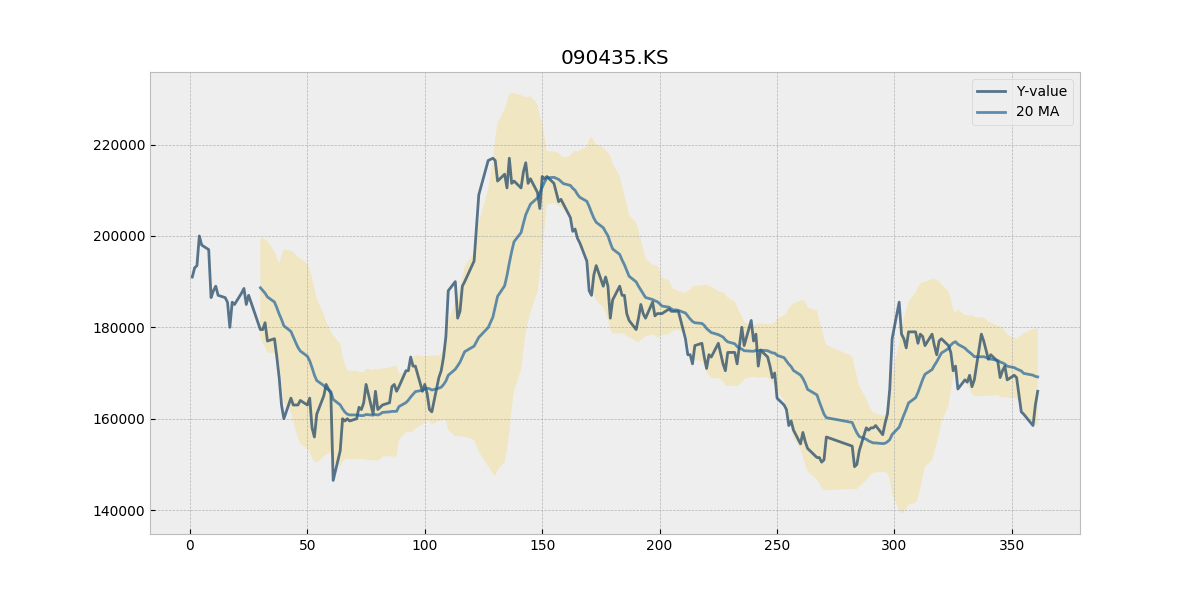

In [7]:
image = base64.b64decode(rows[1][0])
Image(image)